<a href="https://colab.research.google.com/github/yuktagupta/Aribub-project/blob/main/Aribub_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## excel file read

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\college project\Aribnb project\compressed_data.csv", encoding='latin1', low_memory=False)


In [ ]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


## Check the column names in the Dataset

In [ ]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

## Check for Missing Values

In [ ]:
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

## Handle Missing Values

In [ ]:
# Convert 'last review' to datetime
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Fill missing values
df.fillna({
    'reviews per month': 0,
    'last review': df['last review'].min()
}, inplace=True)

df.dropna(subset=['NAME', 'host name'], inplace=True)



In [ ]:
# Check again
print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

## Convert Price & Service Fee Columns

In [ ]:
# Remove '$' and convert to float
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace(r'[\$,]', '', regex=True).astype(float)

In [ ]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,2012-07-11,0.00,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


## Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7.0,12.0,2019-03-27,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1.0,19.0,2017-08-31,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,2.0,50.0,2019-06-26,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2.0,0.0,2012-07-11,0.00,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


## Confirm Cleaned Data Info

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

## Drop Unused Columns

In [ ]:
df = df.drop(columns=["license", "house_rules"], errors='ignore')

In [ ]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,696.0,NaN,7.0,12.0,2019-03-27,0.44,5.0,1.0,0.0
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,909.0,NaN,1.0,19.0,2017-08-31,0.72,3.0,2.0,0.0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,387.0,NaN,2.0,50.0,2019-06-26,3.12,4.0,2.0,235.0
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,848.0,NaN,2.0,0.0,2012-07-11,0.00,1.0,1.0,0.0


##  Descriptive Statistics

In [ ]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


## Top Hosts with Most Listings

In [ ]:
df['host name'].value_counts().head(10)

host name
Michael         877
David           759
John            576
Alex            541
Sonder (NYC)    515
Daniel          468
Karen           436
Sarah           428
Maria           420
Anna            396
Name: count, dtype: int64

##  Average Price by Neighborhood

In [ ]:
df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

neighbourhood group
Queens           629.980824
Bronx            627.634219
Brooklyn         626.477818
Staten Island    623.314894
Manhattan        622.826365
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

## Create a Pivot Table

In [ ]:
#Question: What is the average price per neighborhood group and room type?
pivot_table = pd.pivot_table(
    df,
    values='price',
    index='neighbourhood group',
    columns='room type',
    aggfunc='mean'
)
print(pivot_table)

room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                     621.294758         NaN    634.489348   589.711712
Brooklyn                  627.051386  711.714286    625.550467   634.335373
Manhattan                 623.667394  681.870000    620.430233   634.838782
Queens                    626.636900  433.250000    631.697041   645.206128
Staten Island             642.112288         NaN    601.103524   709.857143
brookln                          NaN         NaN    580.000000          NaN
manhatan                         NaN         NaN    460.000000          NaN


In [ ]:
## Total service fee by host verification and room type
pivot_service = pd.pivot_table(
    df,
    values='service fee',
    index='host_identity_verified',
    columns='room type',
    aggfunc='sum'
)
print(pivot_service)


room type               Entire home/apt  Hotel room  Private room  Shared room
host_identity_verified                                                        
unconfirmed                   3314850.0      7149.0     2869069.0     138918.0
verified                      3294385.0      7800.0     2840934.0     138889.0


In [ ]:
#Count of listings per neighborhood and room type
pivot_count = pd.pivot_table(
    df,
    values='id',
    index='neighbourhood',
    columns='room type',
    aggfunc='count'
)
print(pivot_count)


room type        Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                          
Allerton                    44.0         NaN          52.0          NaN
Arden Heights                7.0         NaN           2.0          NaN
Arrochar                    28.0         NaN          23.0          NaN
Arverne                    142.0         NaN          73.0          4.0
Astoria                    758.0         NaN        1059.0         46.0
...                          ...         ...           ...          ...
Windsor Terrace            234.0         NaN          96.0          NaN
Woodhaven                   52.0         NaN         131.0          5.0
Woodlawn                    10.0         NaN          17.0          2.0
Woodrow                      3.0         NaN           NaN          NaN
Woodside                   147.0         NaN         435.0          2.0

[224 rows x 4 columns]


In [ ]:
#What is the average service fee across different neighborhood groups and cancellation policies?
pivot_service_fee = pd.pivot_table(
    df,
    values='service fee',
    index='neighbourhood group',
    columns='cancellation_policy',
    aggfunc='mean'
)
print(pivot_service_fee)

cancellation_policy    flexible    moderate      strict
neighbourhood group                                    
Bronx                123.374165  128.969765  123.942045
Brooklyn             125.768032  125.114931  124.812763
Manhattan            124.272169  124.401651  124.998525
Queens               127.329516  125.960556  124.775261
Staten Island        128.785479  122.240964  123.092105
brookln                     NaN  116.000000         NaN


In [ ]:
# What is the average minimum nights required in each neighborhood?
pivot_min_nights = pd.pivot_table(
    df,
    values='minimum nights',
    index='neighbourhood',
    aggfunc='mean'
)
print(pivot_min_nights)

                 minimum nights
neighbourhood                  
Allerton               3.500000
Arden Heights         11.333333
Arrochar               3.019608
Arverne                4.269406
Astoria                6.963402
...                         ...
Windsor Terrace        9.334347
Woodhaven              3.798913
Woodlawn               2.607143
Woodrow                5.000000
Woodside              13.127807

[224 rows x 1 columns]


In [ ]:
# How many reviews are received by room types based on whether the host is verified?
pivot_reviews = pd.pivot_table(
    df,
    values='number of reviews',
    index='room type',
    columns='host_identity_verified',
    aggfunc='sum'
)
print(pivot_reviews)

host_identity_verified  unconfirmed  verified
room type                                    
Entire home/apt            727946.0  718409.0
Hotel room                   3843.0    5826.0
Private room               640225.0  632001.0
Shared room                 21812.0   22739.0


In [ ]:
# What is the average minimum nights required in each neighborhood?
pivot_min_nights = pd.pivot_table(
    df,
    values='minimum nights',
    index='neighbourhood',
    aggfunc='mean'
)
print(pivot_min_nights)

                 minimum nights
neighbourhood                  
Allerton               3.500000
Arden Heights         11.333333
Arrochar               3.019608
Arverne                4.269406
Astoria                6.963402
...                         ...
Windsor Terrace        9.334347
Woodhaven              3.798913
Woodlawn               2.607143
Woodrow                5.000000
Woodside              13.127807

[224 rows x 1 columns]


In [ ]:
#How many days on average are listings available across different groups?
pivot_availability = pd.pivot_table(
    df,
    values='availability 365',
    index='neighbourhood group',
    columns='room type',
    aggfunc='mean'
)
print(pivot_availability)

room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                     178.606753         NaN    181.164942   157.724771
Brooklyn                  129.283108  114.142857    128.177437   185.260442
Manhattan                 148.385506  226.660000    130.674791   156.572072
Queens                    158.347406  228.375000    162.142464   197.587079
Staten Island             180.188161         NaN    220.217582    77.714286
brookln                          NaN         NaN     47.000000          NaN
manhatan                         NaN         NaN    325.000000          NaN


In [ ]:
#top hosts only
pivot_host_listings = df['host name'].value_counts().head(10)
print(pivot_host_listings)

host name
Michael         877
David           759
John            576
Alex            541
Sonder (NYC)    515
Daniel          468
Karen           436
Sarah           428
Maria           420
Anna            396
Name: count, dtype: int64


## Price Distribution Visualization

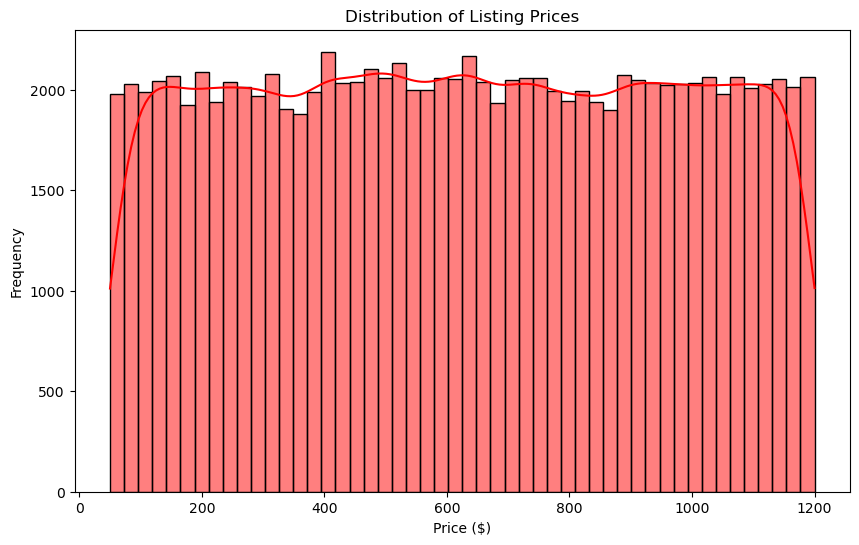

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='red')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

## Room Type Distribution

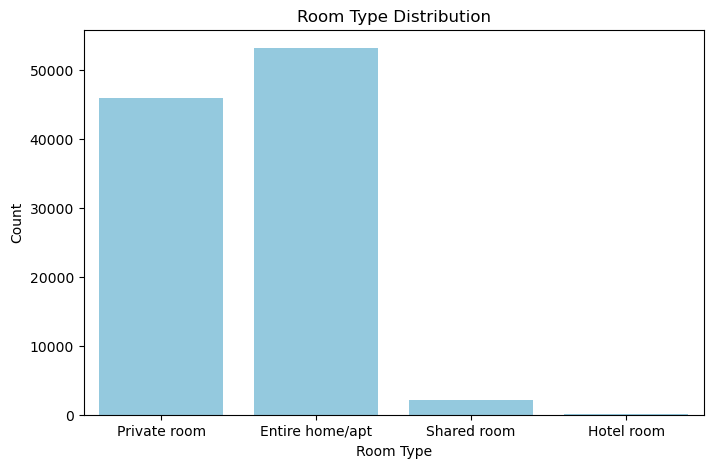

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='room type', data=df, color='skyblue')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

## Neighborhood Group Analysis

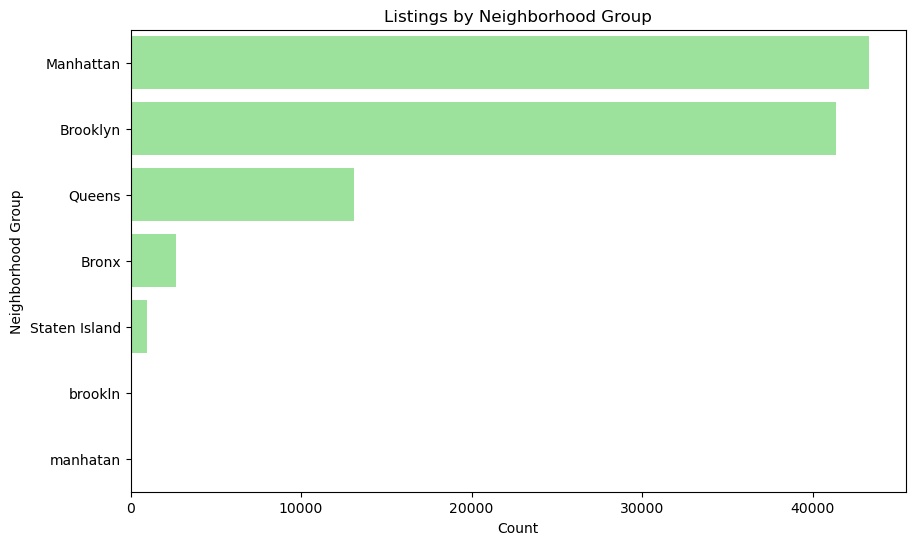

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='neighbourhood group', data=df, order=df['neighbourhood group'].value_counts().index, color='lightgreen')
plt.title('Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')
plt.show()


## Price vs Room Type

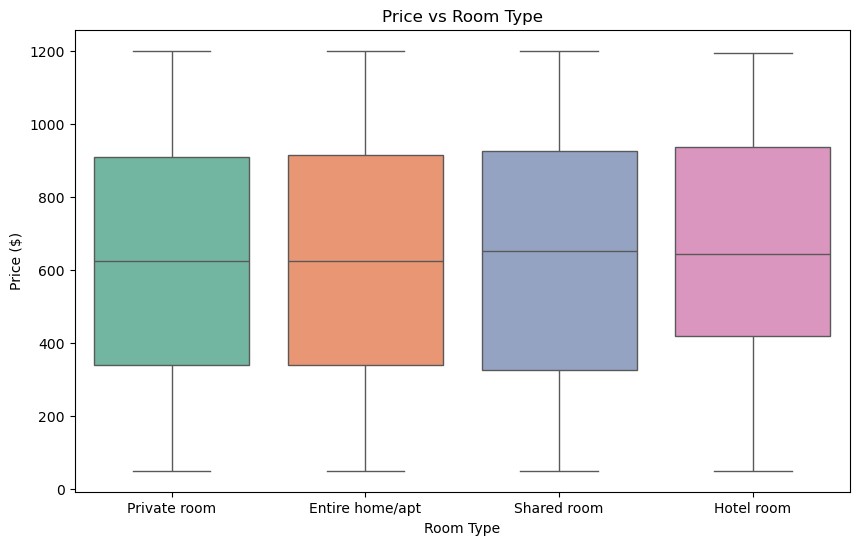

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', hue='room type', data=df, palette='Set2', legend=False)
plt.title('Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()


## Reviews Over Time

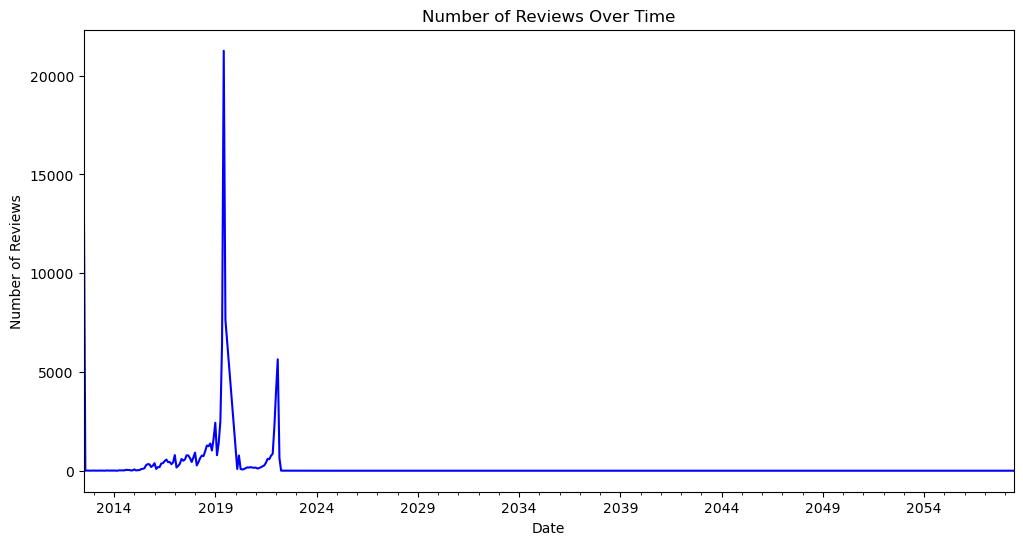

In [ ]:
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line', color='blue')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()
